# Data Reading and Processing

*Importing necessary libraries and resources that will be needed during the execution of the program.*

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.metrics import classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Loading the data sets that will be used in training, testing and validating i.e CustomerChurn_dataset.csv*

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Customer Churning/CustomerChurn_dataset.csv')

*Inspecting the initial rows of our DataFrame. This allows me to see the first few rows of our dataset, helping me understand the structure of the data and the types of values present in each column. It gives me a sense of what the data looks like and will help me decide on further analysis and preprocessing steps.*

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


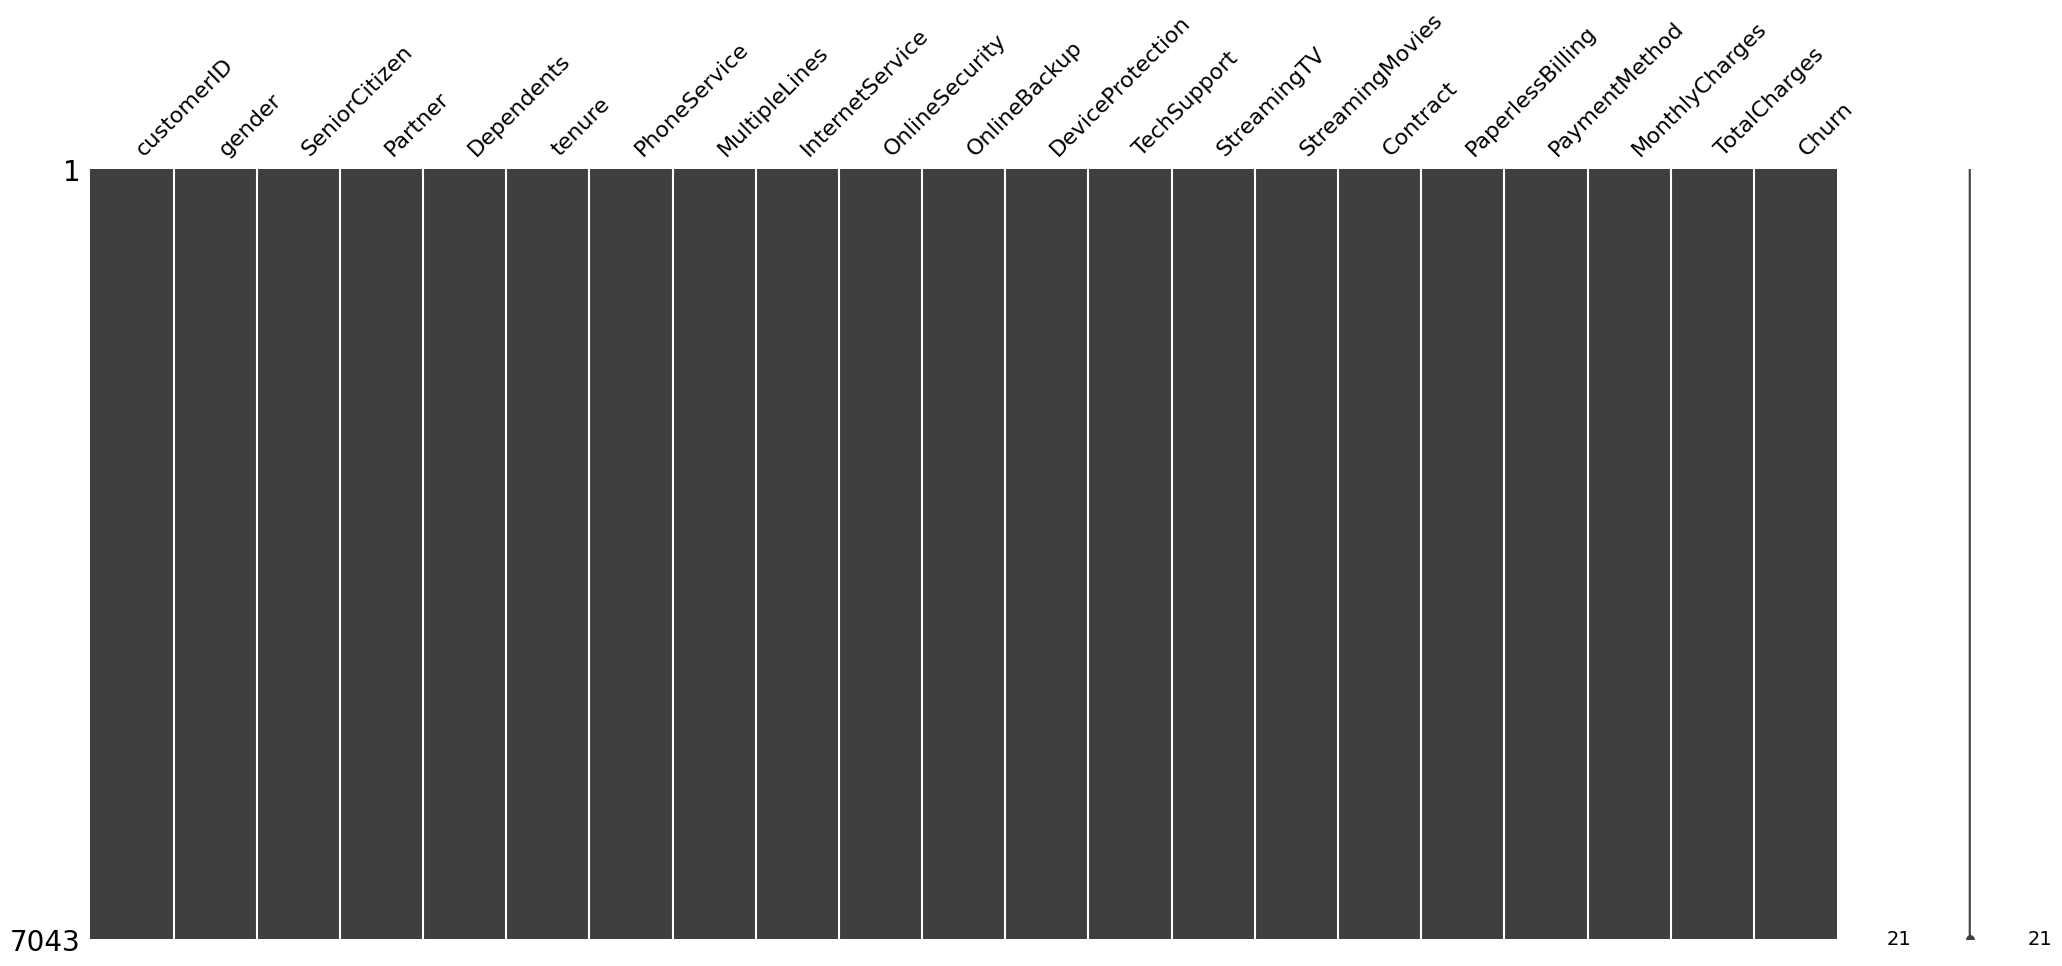

In [ ]:
msno.matrix(df);

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Dropping uneccessary columns in the dataframe**

*Reason for dropping*


*customerID contains unique identifiers for each customer. In predictive modeling, unique identifiers are generally not useful as features because they do not contribute to predicting the target variable (Churn in this case). Including such identifiers can potentially lead the model to overfit to specific individuals rather than learning general patterns.*

In [ ]:
columns_to_drop = ['customerID']
df = df.drop(columns=columns_to_drop, axis=1)

**Label encoding categorical columns**

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical features
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

**Displaying the data after encoding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


*Preparing the data.  X contains the features, and y contains the corresponding labels (target variable).*

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

FEATURE SELECTION


*The below code is creating an instance of the RandomForestClassifier class and fitting it to the training data X and y. This means that it is training the random forest classifier on the given input features X and their corresponding target labels y.*

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

RandomForestClassifier()

*The code below is calculating the feature importances of a random forest classifier (`rf_classifier`) and creating a dataframe (`feature_importance_df`) to store the feature names and their corresponding importances. The dataframe is then sorted in descending order based on the importance values.*

In [ ]:
np.random.seed(42)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df['Cumulative Importance'] = feature_importance_df['Importance'].cumsum()
selected_features = feature_importance_df[feature_importance_df['Cumulative Importance'] <= 0.80]['Feature']
selected_features_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]


*printing the features*


In [ ]:
print("Selected Features with Importances:")
print(selected_features_df)

Selected Features with Importances:
            Feature  Importance  Cumulative Importance
17   MonthlyCharges    0.177523               0.177523
4            tenure    0.175681               0.353203
18     TotalCharges    0.169155               0.522358
14         Contract    0.080606               0.602964
16    PaymentMethod    0.052608               0.655572
8    OnlineSecurity    0.046275               0.701847
11      TechSupport    0.043865               0.745712
7   InternetService    0.028770               0.774482


*Assigning the selected features to X  and displaying them*

In [ ]:
X = X[selected_features]
X

,MonthlyCharges,tenure,TotalCharges,Contract,PaymentMethod,OnlineSecurity,TechSupport,InternetService
0,29.85,1,2505,0,2,0,0,0
1,56.95,34,1466,1,3,2,0,0
2,53.85,2,157,0,3,2,0,0
3,42.30,45,1400,1,0,2,2,0
4,70.70,2,925,0,2,0,0,1
...,...,...,...,...,...,...,...,...
7038,84.80,24,1597,1,3,2,2,0
7039,103.20,72,5698,1,1,0,0,1
7040,29.60,11,2994,0,2,2,0,0
7041,74.40,4,2660,0,3,0,0,1


*Plotting selected feature importances*

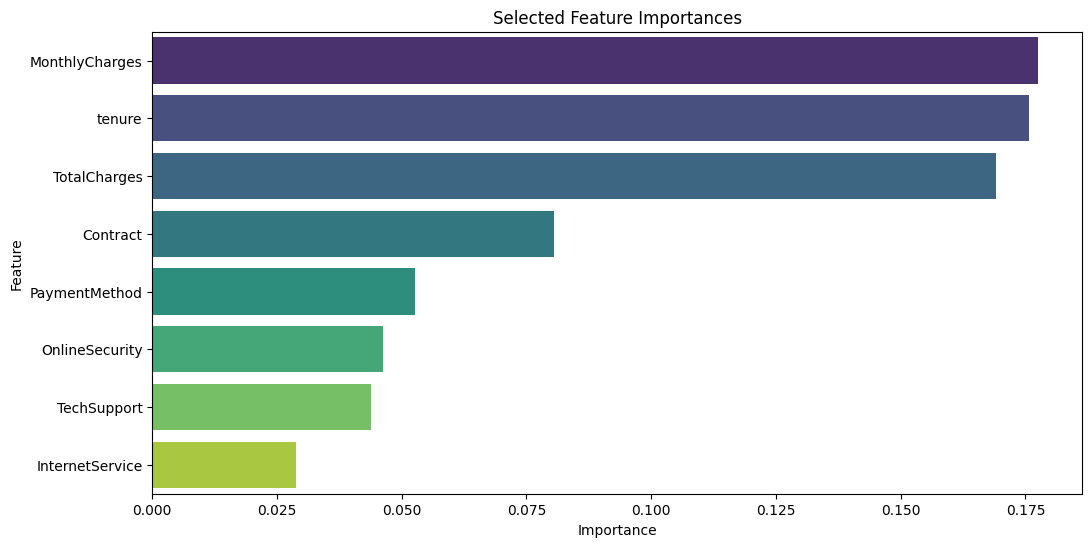

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=selected_features_df, palette='viridis')
plt.title('Selected Feature Importances')
plt.show()



*Plotting cumulative importance for selected features*

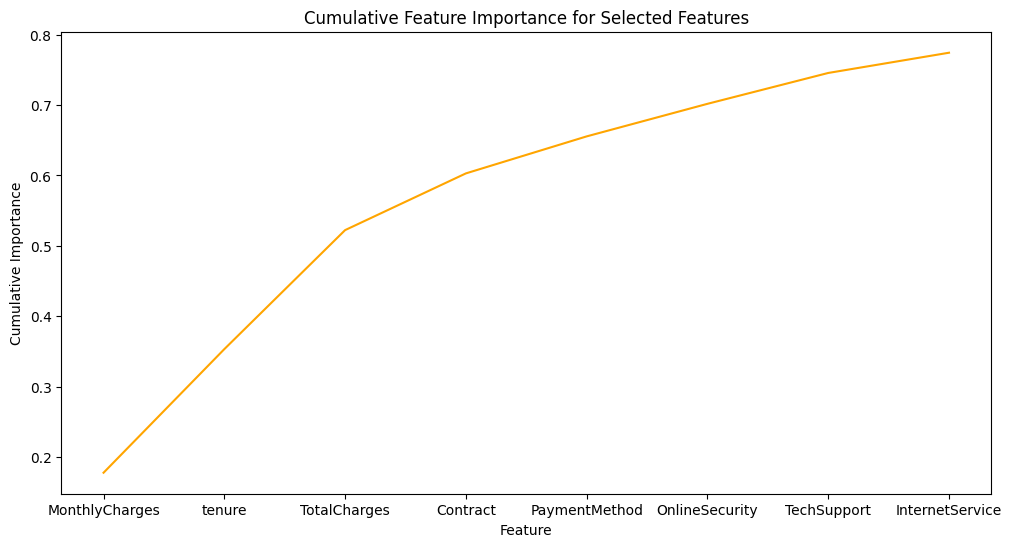

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Feature', y='Cumulative Importance', data=selected_features_df, color='orange')
plt.title('Cumulative Feature Importance for Selected Features')
plt.show()


# Exploratory data Analysis (EDA)

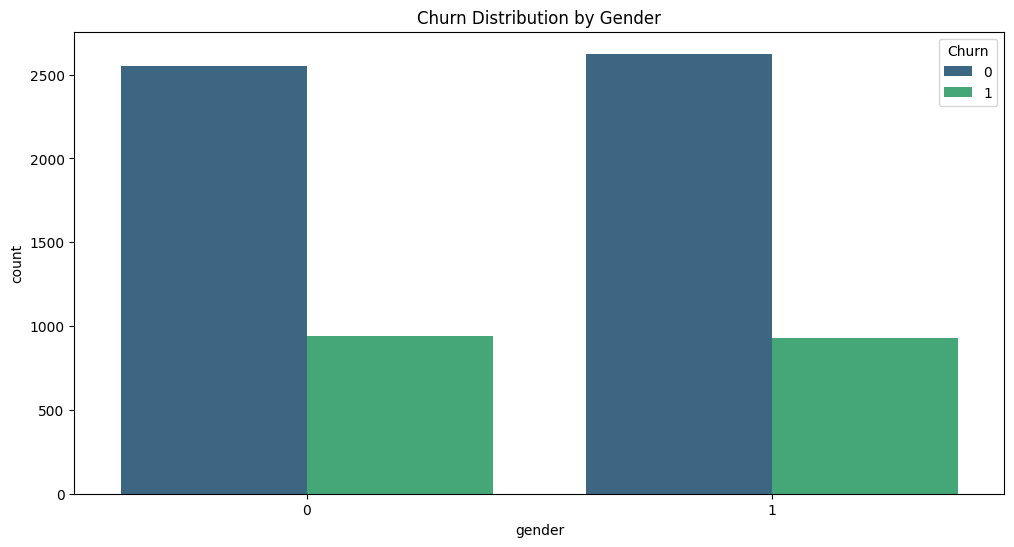

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='Churn', data=df, palette='viridis')
plt.title('Churn Distribution by Gender')
plt.show()

Senior Citizenship Analysis

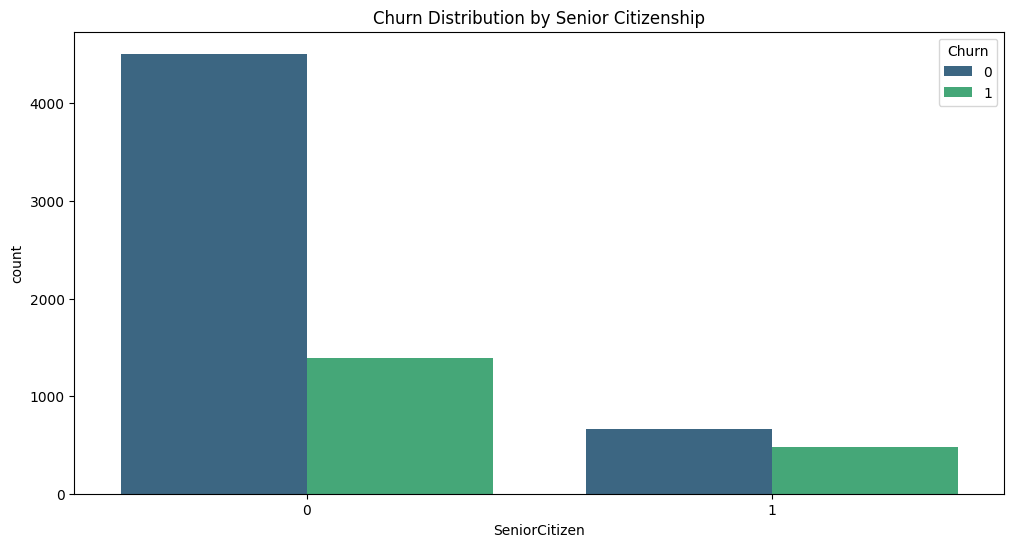

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='viridis')
plt.title('Churn Distribution by Senior Citizenship')
plt.show()

Partner and Dependents Analysis

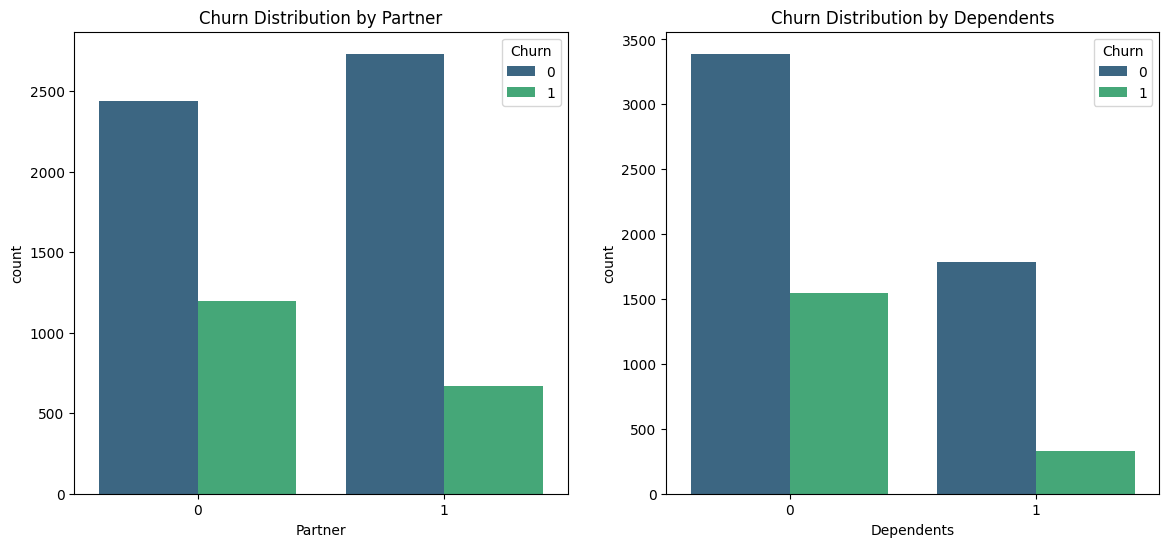

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[0], palette='viridis')
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[0].set_title('Churn Distribution by Partner')
axes[1].set_title('Churn Distribution by Dependents')
plt.show()


 Service-related Analysis

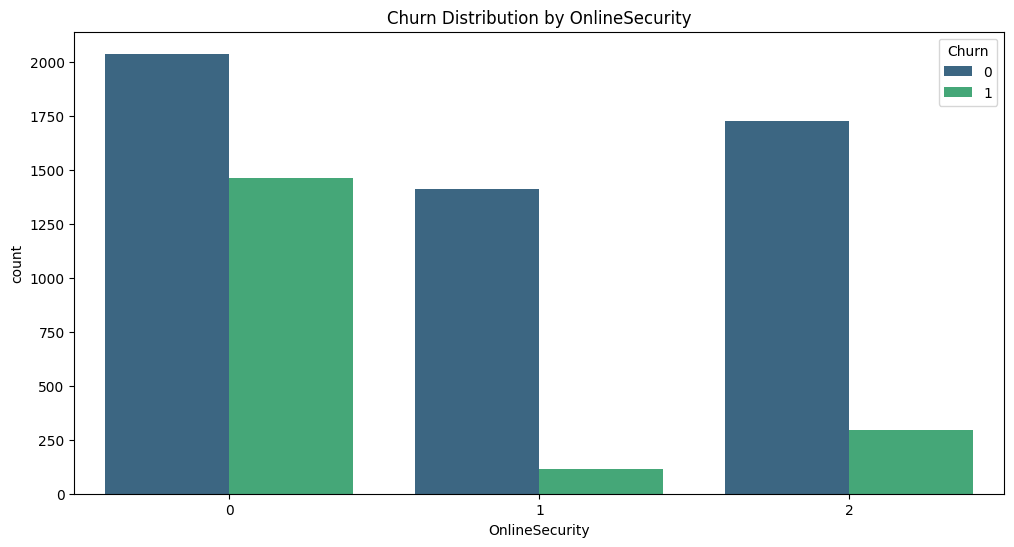

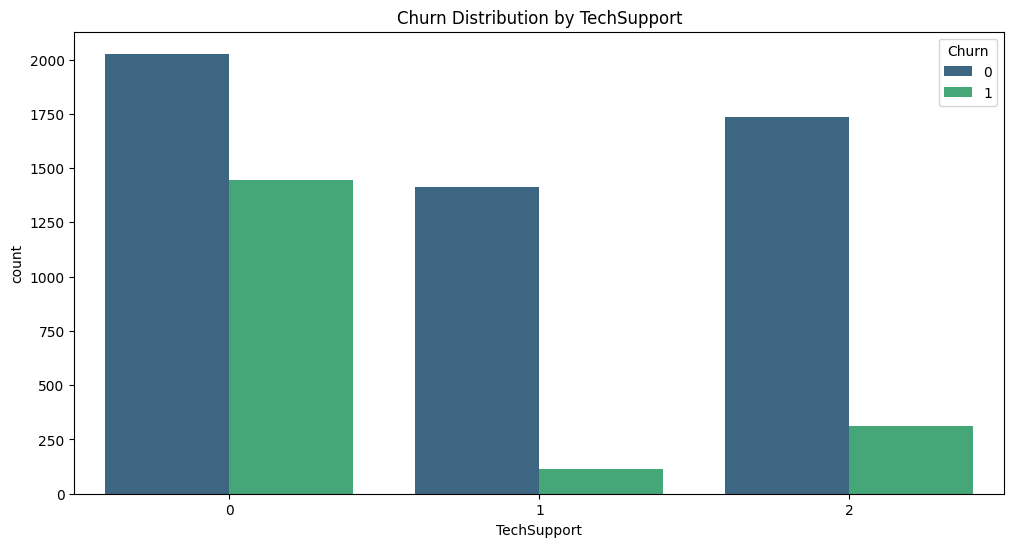

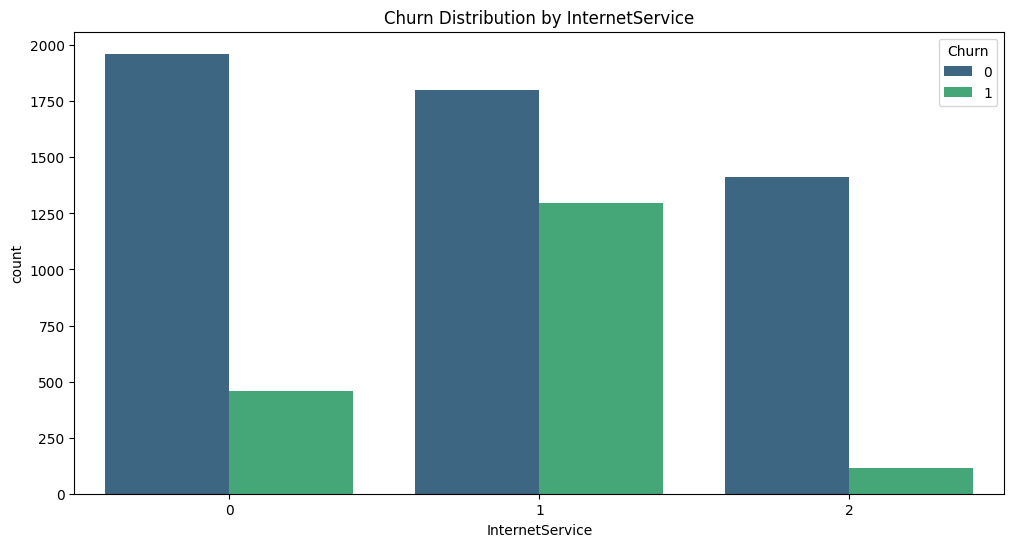

In [ ]:
service_cols = ['OnlineSecurity', 'TechSupport', 'InternetService']
for col in service_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
    plt.title(f'Churn Distribution by {col}')
    plt.show()



Contract and Payment Analysis

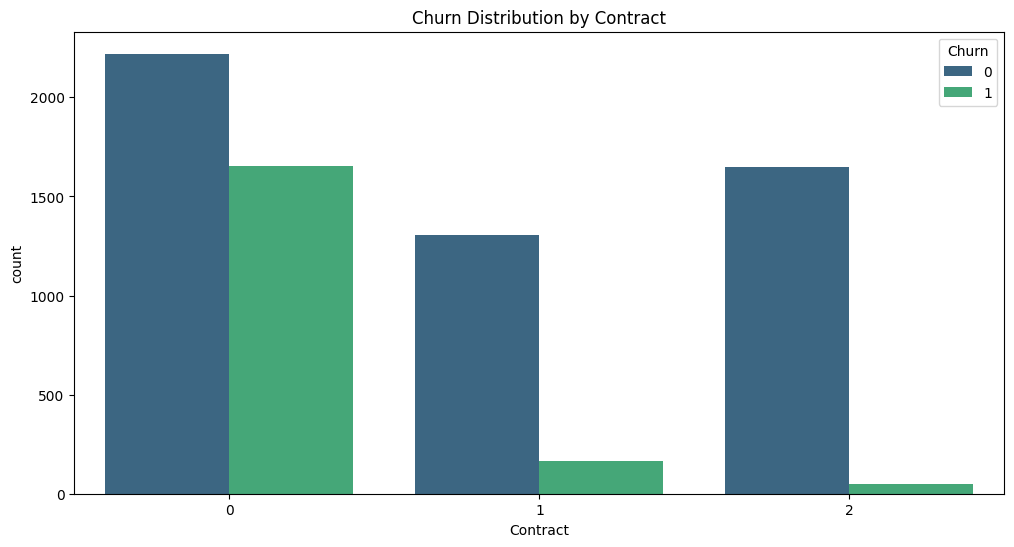

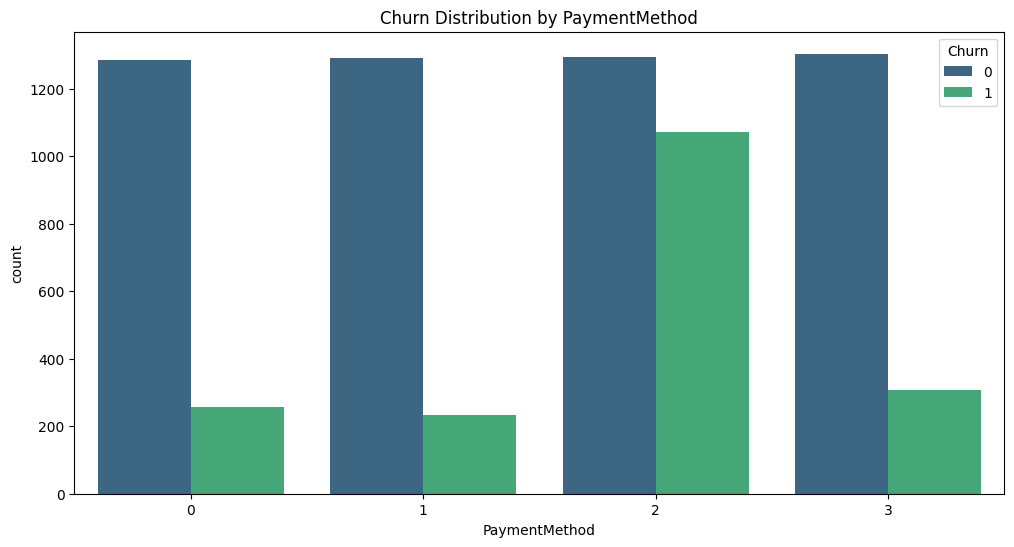

In [ ]:
contract_cols = ['Contract', 'PaymentMethod']
for col in contract_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
    plt.title(f'Churn Distribution by {col}')
    plt.show()


Financial Metrics Analysis


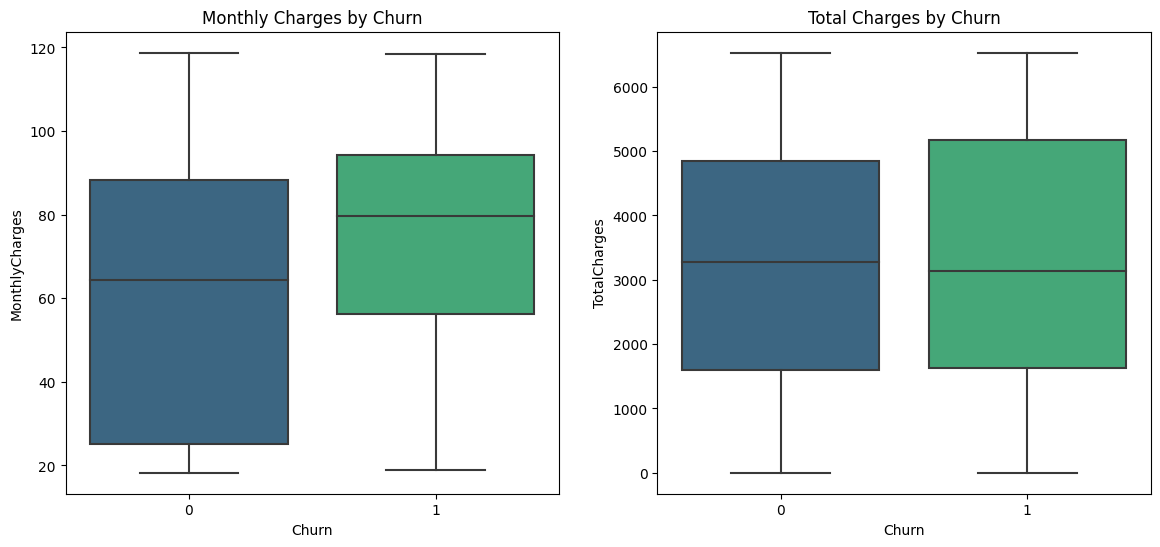

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0], palette='viridis')
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[1], palette='viridis')
axes[0].set_title('Monthly Charges by Churn')
axes[1].set_title('Total Charges by Churn')
plt.show()


Tenure Analysis

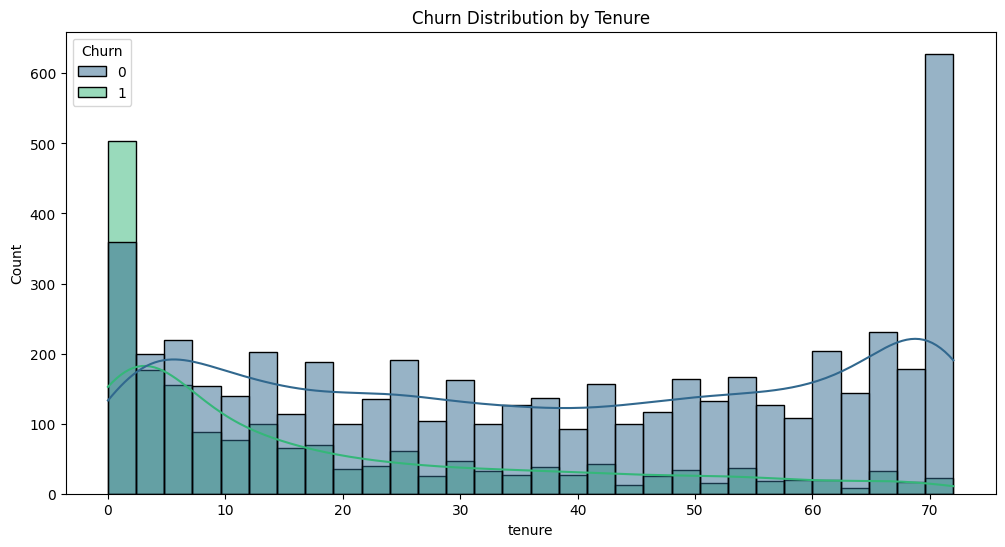

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='tenure', hue='Churn', data=df, bins=30, kde=True, palette='viridis')
plt.title('Churn Distribution by Tenure')
plt.show()

Diverging Correlation Matrix

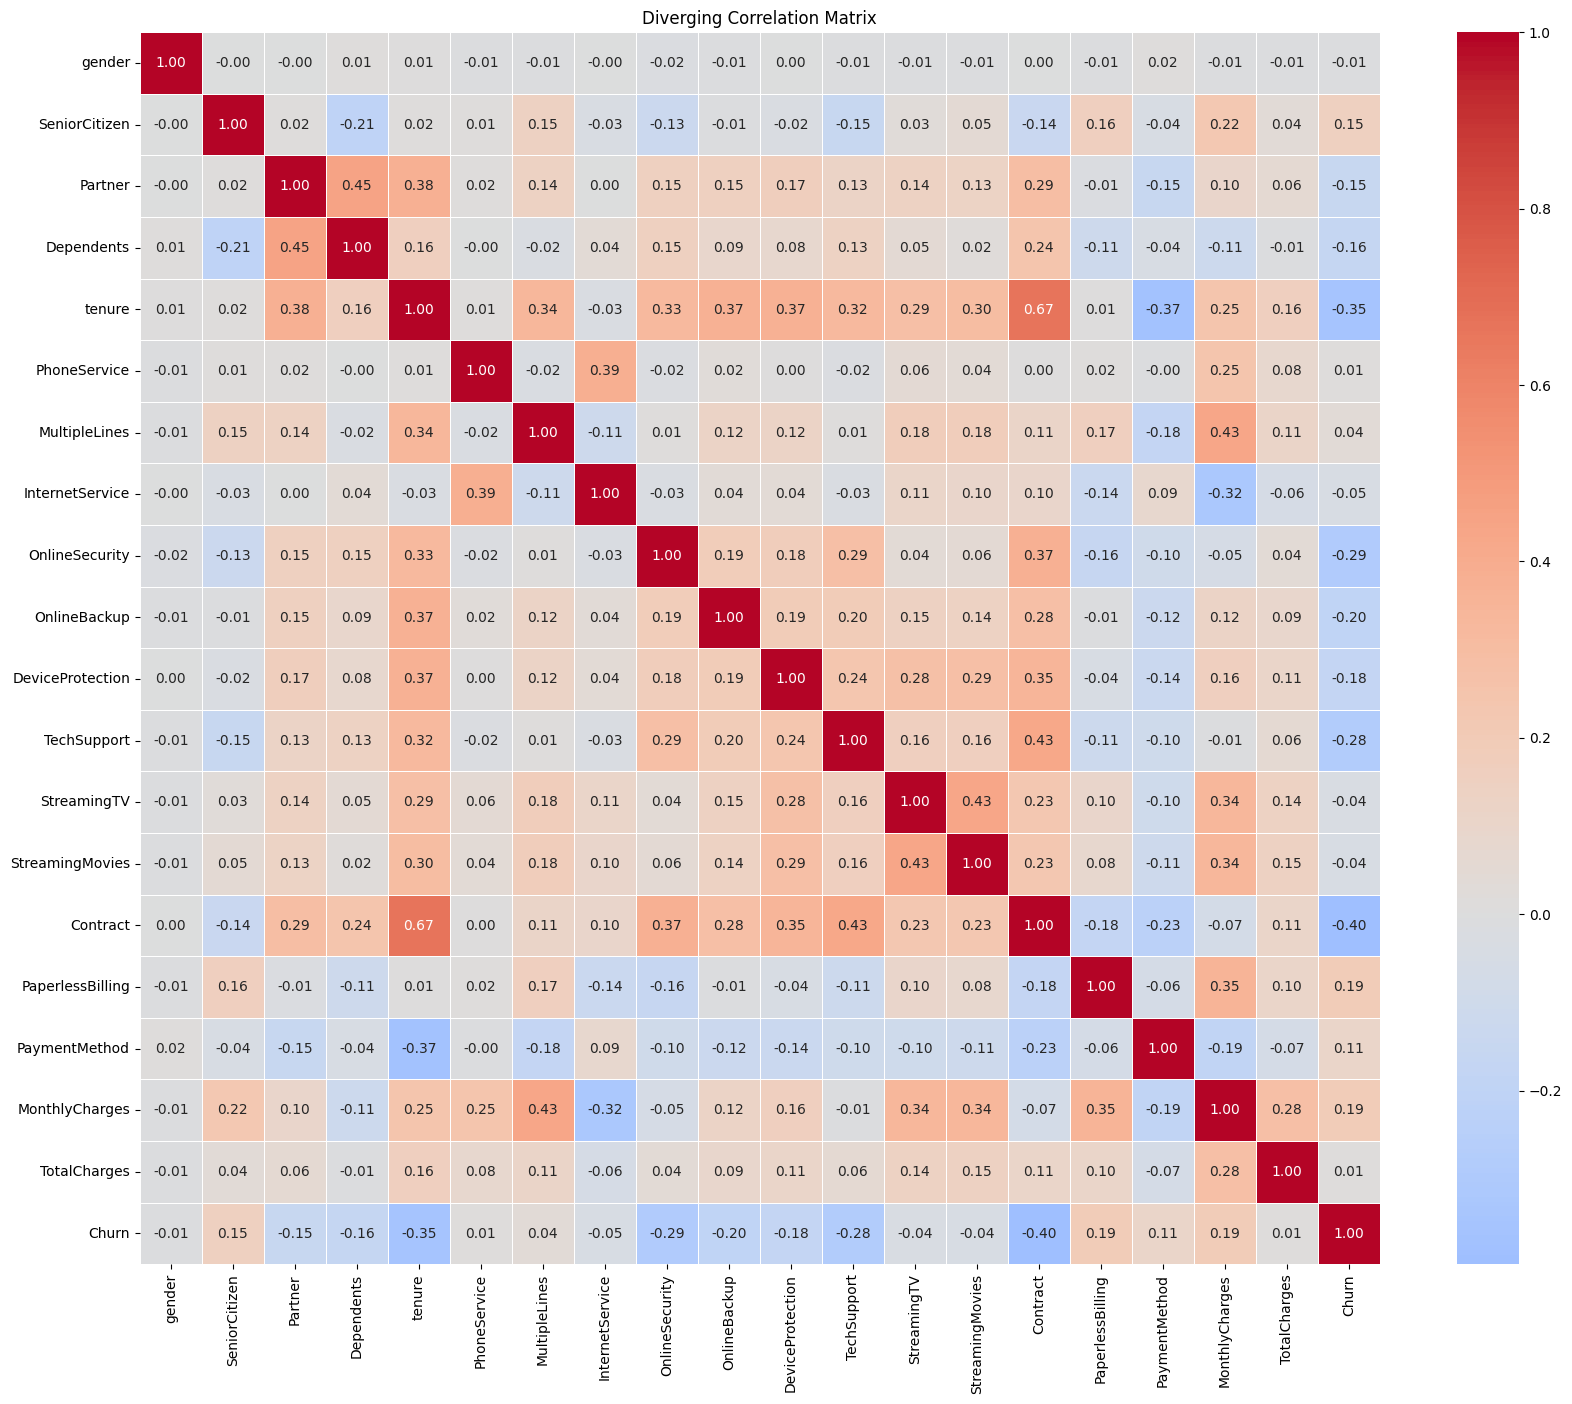

In [ ]:
plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", center=0)
plt.title('Diverging Correlation Matrix')
plt.show()


Scatter plot of Monthly Charges against Tenure

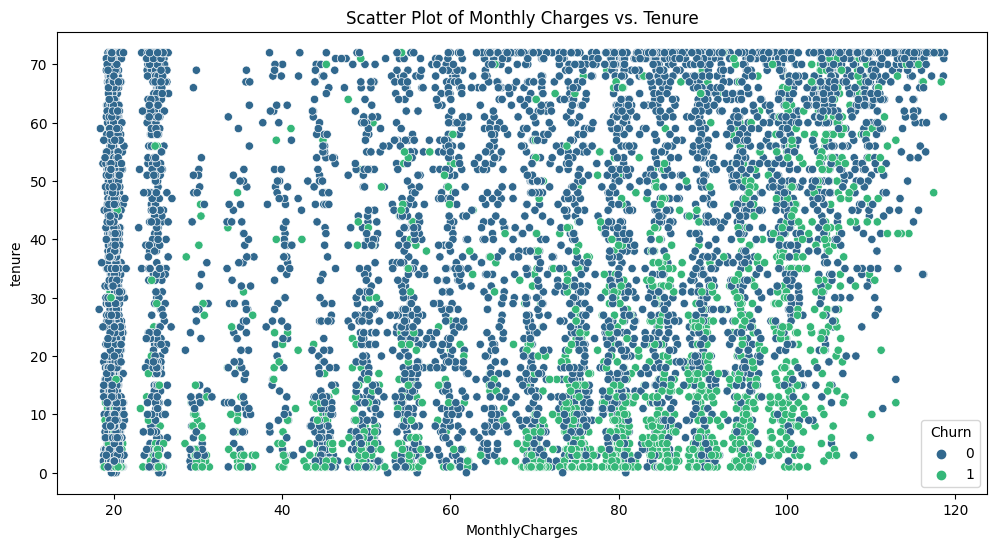

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df, palette='viridis')
plt.title('Scatter Plot of Monthly Charges vs. Tenure')
plt.show()

Scatter plot of Total Charges against Tenure

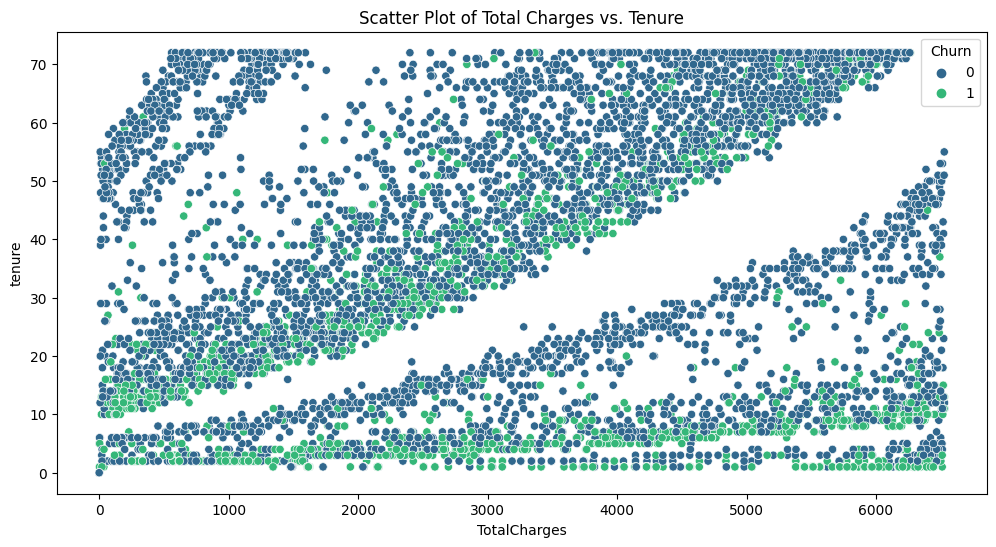

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalCharges', y='tenure', hue='Churn', data=df, palette='viridis')
plt.title('Scatter Plot of Total Charges vs. Tenure')
plt.show()



Checking for any class imbalance

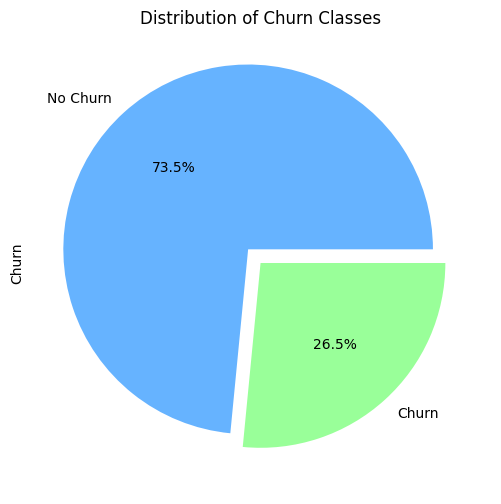

In [ ]:
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], explode=(0.1, 0), labels=['No Churn', 'Churn'])
plt.title('Distribution of Churn Classes')
plt.show()

#Scaling and Splitting

The code is performing feature scaling on the data stored in the variable X. It is using the StandardScaler class from the scikit-learn library to standardize the features by removing the mean and scaling to unit variance. The fit_transform method is used to fit the scaler to the data and transform the data in a single step.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


The below code is splitting the dataset into three parts: training set, validation set, and test set.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Display the shapes of the resulting sets

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (4930, 8) (4930,)
Testing set shape: (1056, 8) (1056,)
Validation set shape: (1057, 8) (1057,)


Plotting the distribution of classes in each set

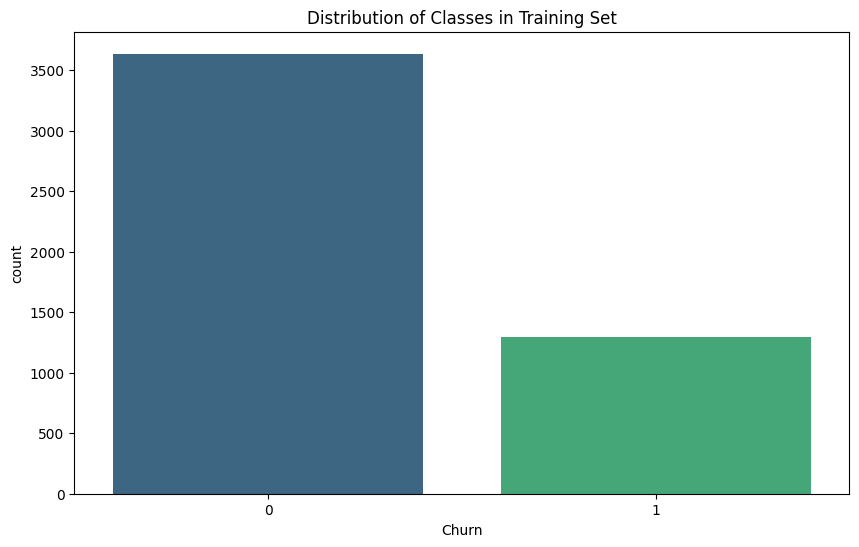

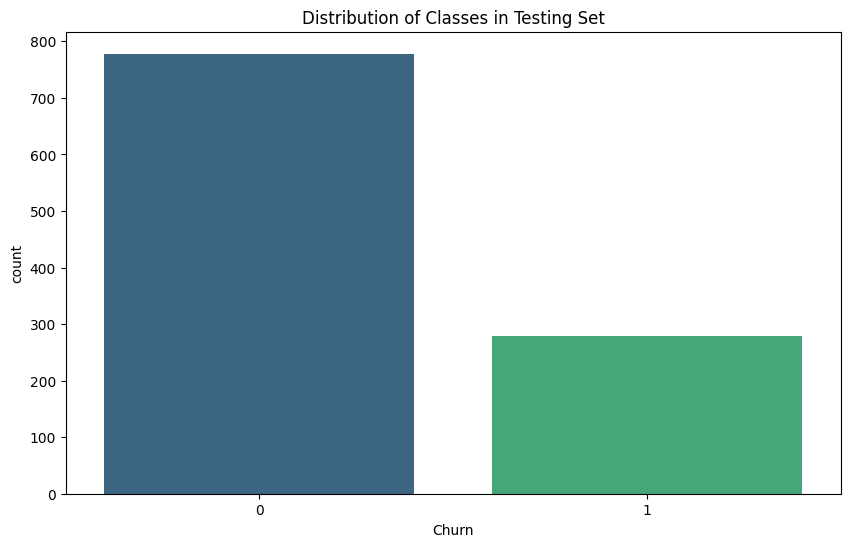

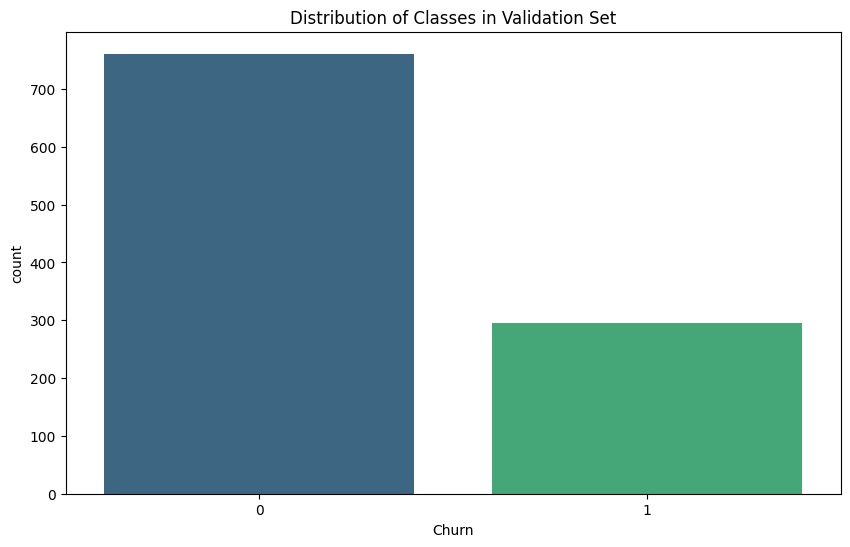

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Classes in Training Set')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, palette='viridis')
plt.title('Distribution of Classes in Testing Set')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=y_val, palette='viridis')
plt.title('Distribution of Classes in Validation Set')
plt.show()


 # Training a Multi-Layer Perceptron model (Keras) using the Functional API

*The function creates a multi-layer perceptron (MLP) model with three hidden layers using the functional API with a specified input shape and returns the compiled model. The model used was Keras*

In [ ]:
def create_mlp_model(input_shape):
    inputs = Input(shape=(input_shape,))
    hidden1 = Dense(64, activation='relu')(inputs)
    hidden2 = Dense(32, activation='relu')(hidden1)
    hidden3 = Dense(16, activation='relu')(hidden2)
    output = Dense(1, activation='sigmoid')(hidden3)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

*The below code is creating a KerasClassifier model for a multi-layer perceptron (MLP) neural network. It is using the create_mlp_model function (which makes use of a keras Model) to define the architecture of the model. The model is then passed as an argument to the KerasClassifier class, along with other parameters such as input_shape, epochs, batch_size, and verbose.*

In [ ]:
mlp_model = KerasClassifier(build_fn=create_mlp_model, input_shape=X_train.shape[1], epochs=10, batch_size=32, verbose=1)
param_grid = {
    'epochs': [10, 20],
    'batch_size': [32, 64],
    'validation_split': [0.1, 0.2]
}

*The  code is performing a grid search to find the best hyperparameters for a multi-layer perceptron (MLP) model. It uses the GridSearchCV to search through a specified parameter grid and evaluate the model's performance using
cross-validation.*

In [ ]:
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
93/93 [==============================] - 2s 5ms/step - loss: 0.4908 - accuracy: 0.7579 - val_loss: 0.3987 - val_accuracy: 0.8237
Epoch 2/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.7815 - val_loss: 0.3867 - val_accuracy: 0.8116
Epoch 3/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.7825 - val_loss: 0.3836 - val_accuracy: 0.8146
Epoch 4/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.7832 - val_loss: 0.3789 - val_accuracy: 0.8146
Epoch 5/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4284 - accuracy: 0.7798 - val_loss: 0.3814 - val_accuracy: 0.8207
Epoch 6/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.7849 - val_loss: 0.3722 - val_accuracy: 0.8116
Epoch 7/10
93/93 [==============================] - 0s 4ms/step - loss: 0.4259 - accuracy: 0.7866 - val_loss: 0.3745 - val_accuracy: 0.8055
Epoch 8/10
93/93 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


93/93 [==============================] - 2s 7ms/step - loss: 0.4976 - accuracy: 0.7319 - val_loss: 0.4119 - val_accuracy: 0.7751
Epoch 2/10
93/93 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.7603 - val_loss: 0.3938 - val_accuracy: 0.8176
Epoch 3/10
93/93 [==============================] - 0s 4ms/step - loss: 0.4364 - accuracy: 0.7907 - val_loss: 0.3913 - val_accuracy: 0.8146
Epoch 4/10
93/93 [==============================] - 0s 5ms/step - loss: 0.4314 - accuracy: 0.7968 - val_loss: 0.3921 - val_accuracy: 0.8207
Epoch 5/10
93/93 [==============================] - 0s 4ms/step - loss: 0.4290 - accuracy: 0.7982 - val_loss: 0.3879 - val_accuracy: 0.8146
Epoch 6/10
93/93 [==============================] - 0s 4ms/step - loss: 0.4266 - accuracy: 0.8029 - val_loss: 0.3871 - val_accuracy: 0.8237
Epoch 7/10
93/93 [==============================] - 0s 4ms/step - loss: 0.4239 - accuracy: 0.8022 - val_loss: 0.3843 - val_accuracy: 0.8176
Epoch 8/10
93/93 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


93/93 [==============================] - 1s 5ms/step - loss: 0.5198 - accuracy: 0.7292 - val_loss: 0.4539 - val_accuracy: 0.7599
Epoch 2/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4334 - accuracy: 0.7884 - val_loss: 0.4241 - val_accuracy: 0.7720
Epoch 3/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.7897 - val_loss: 0.4271 - val_accuracy: 0.7720
Epoch 4/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.7921 - val_loss: 0.4252 - val_accuracy: 0.7660
Epoch 5/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.8032 - val_loss: 0.4250 - val_accuracy: 0.7751
Epoch 6/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8016 - val_loss: 0.4246 - val_accuracy: 0.7720
Epoch 7/10
93/93 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8002 - val_loss: 0.4175 - val_accuracy: 0.7842
Epoch 8/10
93/93 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


83/83 [==============================] - 1s 5ms/step - loss: 0.4953 - accuracy: 0.7458 - val_loss: 0.4334 - val_accuracy: 0.7918
Epoch 2/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.7740 - val_loss: 0.4281 - val_accuracy: 0.7918
Epoch 3/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4412 - accuracy: 0.7778 - val_loss: 0.4081 - val_accuracy: 0.7903
Epoch 4/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.7835 - val_loss: 0.4131 - val_accuracy: 0.7933
Epoch 5/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.7877 - val_loss: 0.4020 - val_accuracy: 0.8085
Epoch 6/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.7900 - val_loss: 0.4021 - val_accuracy: 0.8116
Epoch 7/10
83/83 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.7877 - val_loss: 0.4019 - val_accuracy: 0.8116
Epoch 8/10
83/83 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


83/83 [==============================] - 2s 6ms/step - loss: 0.5221 - accuracy: 0.7379 - val_loss: 0.4366 - val_accuracy: 0.7964
Epoch 2/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4335 - accuracy: 0.7946 - val_loss: 0.4166 - val_accuracy: 0.7979
Epoch 3/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8003 - val_loss: 0.4144 - val_accuracy: 0.8040
Epoch 4/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.7999 - val_loss: 0.4091 - val_accuracy: 0.7994
Epoch 5/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.8033 - val_loss: 0.4103 - val_accuracy: 0.7918
Epoch 6/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.7999 - val_loss: 0.4111 - val_accuracy: 0.7964
Epoch 7/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.7995 - val_loss: 0.4133 - val_accuracy: 0.8024
Epoch 8/10
83/83 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


83/83 [==============================] - 1s 5ms/step - loss: 0.5018 - accuracy: 0.7763 - val_loss: 0.4347 - val_accuracy: 0.7842
Epoch 2/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4348 - accuracy: 0.7942 - val_loss: 0.4244 - val_accuracy: 0.7690
Epoch 3/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.8018 - val_loss: 0.4229 - val_accuracy: 0.7766
Epoch 4/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4271 - accuracy: 0.7988 - val_loss: 0.4199 - val_accuracy: 0.7751
Epoch 5/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.7980 - val_loss: 0.4179 - val_accuracy: 0.7720
Epoch 6/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8068 - val_loss: 0.4131 - val_accuracy: 0.7857
Epoch 7/10
83/83 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.8030 - val_loss: 0.4211 - val_accuracy: 0.7720
Epoch 8/10
83/83 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


93/93 [==============================] - 2s 7ms/step - loss: 0.4929 - accuracy: 0.7308 - val_loss: 0.4082 - val_accuracy: 0.7812
Epoch 2/20
93/93 [==============================] - 0s 5ms/step - loss: 0.4523 - accuracy: 0.7612 - val_loss: 0.3952 - val_accuracy: 0.8237
Epoch 3/20
93/93 [==============================] - 0s 4ms/step - loss: 0.4474 - accuracy: 0.7792 - val_loss: 0.3894 - val_accuracy: 0.8267
Epoch 4/20
93/93 [==============================] - 0s 4ms/step - loss: 0.4440 - accuracy: 0.7839 - val_loss: 0.3878 - val_accuracy: 0.8085
Epoch 5/20
93/93 [==============================] - 0s 4ms/step - loss: 0.4368 - accuracy: 0.7758 - val_loss: 0.3767 - val_accuracy: 0.8298
Epoch 6/20
93/93 [==============================] - 0s 4ms/step - loss: 0.4324 - accuracy: 0.7836 - val_loss: 0.3814 - val_accuracy: 0.8267
Epoch 7/20
93/93 [==============================] - 0s 4ms/step - loss: 0.4274 - accuracy: 0.7836 - val_loss: 0.3758 - val_accuracy: 0.8146
Epoch 8/20
93/93 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


93/93 [==============================] - 2s 5ms/step - loss: 0.4851 - accuracy: 0.7583 - val_loss: 0.3904 - val_accuracy: 0.8085
Epoch 2/20
93/93 [==============================] - 0s 3ms/step - loss: 0.4312 - accuracy: 0.7931 - val_loss: 0.3798 - val_accuracy: 0.8146
Epoch 3/20
93/93 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.7928 - val_loss: 0.3774 - val_accuracy: 0.8024
Epoch 4/20
93/93 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.7968 - val_loss: 0.3786 - val_accuracy: 0.8024
Epoch 5/20
93/93 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.7975 - val_loss: 0.3824 - val_accuracy: 0.8176
Epoch 6/20
93/93 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8019 - val_loss: 0.3805 - val_accuracy: 0.8085
Epoch 7/20
93/93 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8049 - val_loss: 0.3832 - val_accuracy: 0.8085
Epoch 8/20
93/93 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


93/93 [==============================] - 2s 7ms/step - loss: 0.4920 - accuracy: 0.7569 - val_loss: 0.4398 - val_accuracy: 0.7599
Epoch 2/20
93/93 [==============================] - 0s 4ms/step - loss: 0.4300 - accuracy: 0.7955 - val_loss: 0.4263 - val_accuracy: 0.7781
Epoch 3/20
93/93 [==============================] - 0s 4ms/step - loss: 0.4242 - accuracy: 0.7951 - val_loss: 0.4354 - val_accuracy: 0.7660
Epoch 4/20
93/93 [==============================] - 0s 5ms/step - loss: 0.4197 - accuracy: 0.7961 - val_loss: 0.4253 - val_accuracy: 0.7660
Epoch 5/20
93/93 [==============================] - 0s 4ms/step - loss: 0.4157 - accuracy: 0.8070 - val_loss: 0.4357 - val_accuracy: 0.7690
Epoch 6/20
93/93 [==============================] - 0s 4ms/step - loss: 0.4143 - accuracy: 0.8036 - val_loss: 0.4295 - val_accuracy: 0.7720
Epoch 7/20
93/93 [==============================] - 0s 5ms/step - loss: 0.4110 - accuracy: 0.8070 - val_loss: 0.4209 - val_accuracy: 0.7872
Epoch 8/20
93/93 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


83/83 [==============================] - 1s 5ms/step - loss: 0.4964 - accuracy: 0.7568 - val_loss: 0.4229 - val_accuracy: 0.8055
Epoch 2/20
83/83 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.7736 - val_loss: 0.4070 - val_accuracy: 0.8131
Epoch 3/20
83/83 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.7804 - val_loss: 0.4036 - val_accuracy: 0.8131
Epoch 4/20
83/83 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.7812 - val_loss: 0.4043 - val_accuracy: 0.8040
Epoch 5/20
83/83 [==============================] - 0s 4ms/step - loss: 0.4310 - accuracy: 0.7846 - val_loss: 0.4011 - val_accuracy: 0.8024
Epoch 6/20
83/83 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.7854 - val_loss: 0.4008 - val_accuracy: 0.8085
Epoch 7/20
83/83 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.7919 - val_loss: 0.4085 - val_accuracy: 0.8070
Epoch 8/20
83/83 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
83/83 [==============================] - 3s 8ms/step - loss: 0.5030 - accuracy: 0.7528 - val_loss: 0.4276 - val_accuracy: 0.8009
Epoch 2/20
83/83 [==============================] - 0s 5ms/step - loss: 0.4291 - accuracy: 0.7954 - val_loss: 0.4209 - val_accuracy: 0.7979
Epoch 3/20
83/83 [==============================] - 0s 5ms/step - loss: 0.4214 - accuracy: 0.7954 - val_loss: 0.4168 - val_accuracy: 0.8024
Epoch 4/20
83/83 [==============================] - 0s 5ms/step - loss: 0.4201 - accuracy: 0.7942 - val_loss: 0.4102 - val_accuracy: 0.7948
Epoch 5/20
83/83 [==============================] - 0s 5ms/step - loss: 0.4173 - accuracy: 0.7973 - val_loss: 0.4063 - val_accuracy: 0.8009
Epoch 6/20
83/83 [==============================] - 1s 10ms/step - loss: 0.4151 - accuracy: 0.8026 - val_loss: 0.4070 - val_accuracy: 0.8024
Epoch 7/20
83/83 [==============================] - 0s 6ms/step - loss: 0.4136 - accuracy: 0.8022 - val_loss: 0.4087 - val_accuracy: 0.8085
Epoch 8/20
83/83 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


83/83 [==============================] - 1s 6ms/step - loss: 0.4910 - accuracy: 0.7623 - val_loss: 0.4183 - val_accuracy: 0.7736
Epoch 2/20
83/83 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.7969 - val_loss: 0.4146 - val_accuracy: 0.7842
Epoch 3/20
83/83 [==============================] - 0s 5ms/step - loss: 0.4308 - accuracy: 0.8014 - val_loss: 0.4158 - val_accuracy: 0.7827
Epoch 4/20
83/83 [==============================] - 0s 5ms/step - loss: 0.4246 - accuracy: 0.7984 - val_loss: 0.4116 - val_accuracy: 0.7888
Epoch 5/20
83/83 [==============================] - 0s 4ms/step - loss: 0.4232 - accuracy: 0.8026 - val_loss: 0.4128 - val_accuracy: 0.7888
Epoch 6/20
83/83 [==============================] - 0s 4ms/step - loss: 0.4208 - accuracy: 0.8033 - val_loss: 0.4126 - val_accuracy: 0.7888
Epoch 7/20
83/83 [==============================] - 0s 5ms/step - loss: 0.4185 - accuracy: 0.8049 - val_loss: 0.4119 - val_accuracy: 0.7903
Epoch 8/20
83/83 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
47/47 [==============================] - 2s 11ms/step - loss: 0.5292 - accuracy: 0.7599 - val_loss: 0.4250 - val_accuracy: 0.7964
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.7775 - val_loss: 0.4034 - val_accuracy: 0.8085
Epoch 3/10
47/47 [==============================] - 0s 5ms/step - loss: 0.4401 - accuracy: 0.7788 - val_loss: 0.3915 - val_accuracy: 0.8176
Epoch 4/10
47/47 [==============================] - 0s 5ms/step - loss: 0.4350 - accuracy: 0.7863 - val_loss: 0.3880 - val_accuracy: 0.8176
Epoch 5/10
47/47 [==============================] - 0s 7ms/step - loss: 0.4321 - accuracy: 0.7883 - val_loss: 0.3827 - val_accuracy: 0.8146
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 0.4287 - accuracy: 0.7907 - val_loss: 0.3810 - val_accuracy: 0.8116
Epoch 7/10
47/47 [==============================] - 0s 6ms/step - loss: 0.4288 - accuracy: 0.7900 - val_loss: 0.3794 - val_accuracy: 0.8055
Epoch 8/10
47/47 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 [==============================] - 2s 13ms/step - loss: 0.5541 - accuracy: 0.7170 - val_loss: 0.4168 - val_accuracy: 0.8085
Epoch 2/10
47/47 [==============================] - 0s 6ms/step - loss: 0.4397 - accuracy: 0.7921 - val_loss: 0.3987 - val_accuracy: 0.8024
Epoch 3/10
47/47 [==============================] - 0s 5ms/step - loss: 0.4273 - accuracy: 0.7992 - val_loss: 0.3846 - val_accuracy: 0.8055
Epoch 4/10
47/47 [==============================] - 0s 5ms/step - loss: 0.4221 - accuracy: 0.8022 - val_loss: 0.3822 - val_accuracy: 0.8176
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4193 - accuracy: 0.8019 - val_loss: 0.3788 - val_accuracy: 0.8207
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 0.4164 - accuracy: 0.8022 - val_loss: 0.3788 - val_accuracy: 0.8055
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4168 - accuracy: 0.8005 - val_loss: 0.3824 - val_accuracy: 0.8176
Epoch 8/10
47/47 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 [==============================] - 2s 10ms/step - loss: 0.5395 - accuracy: 0.7336 - val_loss: 0.4379 - val_accuracy: 0.8055
Epoch 2/10
47/47 [==============================] - 0s 9ms/step - loss: 0.4389 - accuracy: 0.7887 - val_loss: 0.4348 - val_accuracy: 0.7720
Epoch 3/10
47/47 [==============================] - 0s 8ms/step - loss: 0.4277 - accuracy: 0.7961 - val_loss: 0.4368 - val_accuracy: 0.7751
Epoch 4/10
47/47 [==============================] - 0s 10ms/step - loss: 0.4228 - accuracy: 0.8049 - val_loss: 0.4303 - val_accuracy: 0.7872
Epoch 5/10
47/47 [==============================] - 0s 8ms/step - loss: 0.4207 - accuracy: 0.8002 - val_loss: 0.4248 - val_accuracy: 0.7903
Epoch 6/10
47/47 [==============================] - 0s 8ms/step - loss: 0.4173 - accuracy: 0.8026 - val_loss: 0.4278 - val_accuracy: 0.7903
Epoch 7/10
47/47 [==============================] - 0s 10ms/step - loss: 0.4183 - accuracy: 0.8029 - val_loss: 0.4326 - val_accuracy: 0.7751
Epoch 8/10
47/47 [==========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


42/42 [==============================] - 2s 12ms/step - loss: 0.5499 - accuracy: 0.7158 - val_loss: 0.4513 - val_accuracy: 0.7872
Epoch 2/10
42/42 [==============================] - 0s 6ms/step - loss: 0.4581 - accuracy: 0.7766 - val_loss: 0.4272 - val_accuracy: 0.7964
Epoch 3/10
42/42 [==============================] - 0s 6ms/step - loss: 0.4438 - accuracy: 0.7789 - val_loss: 0.4147 - val_accuracy: 0.8131
Epoch 4/10
42/42 [==============================] - 0s 8ms/step - loss: 0.4356 - accuracy: 0.7865 - val_loss: 0.4067 - val_accuracy: 0.8191
Epoch 5/10
42/42 [==============================] - 0s 5ms/step - loss: 0.4315 - accuracy: 0.7869 - val_loss: 0.4073 - val_accuracy: 0.8146
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.7881 - val_loss: 0.4041 - val_accuracy: 0.8070
Epoch 7/10
42/42 [==============================] - 0s 4ms/step - loss: 0.4270 - accuracy: 0.7938 - val_loss: 0.4043 - val_accuracy: 0.8116
Epoch 8/10
42/42 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


42/42 [==============================] - 1s 7ms/step - loss: 0.6548 - accuracy: 0.6128 - val_loss: 0.5242 - val_accuracy: 0.7918
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.7847 - val_loss: 0.4269 - val_accuracy: 0.8040
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.7988 - val_loss: 0.4188 - val_accuracy: 0.7994
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.8011 - val_loss: 0.4158 - val_accuracy: 0.7918
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.8003 - val_loss: 0.4128 - val_accuracy: 0.7948
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.7969 - val_loss: 0.4106 - val_accuracy: 0.7994
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8022 - val_loss: 0.4079 - val_accuracy: 0.8024
Epoch 8/10
42/42 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


42/42 [==============================] - 1s 10ms/step - loss: 0.5509 - accuracy: 0.7140 - val_loss: 0.4500 - val_accuracy: 0.7705
Epoch 2/10
42/42 [==============================] - 0s 6ms/step - loss: 0.4553 - accuracy: 0.7748 - val_loss: 0.4261 - val_accuracy: 0.7872
Epoch 3/10
42/42 [==============================] - 0s 5ms/step - loss: 0.4365 - accuracy: 0.7992 - val_loss: 0.4185 - val_accuracy: 0.7827
Epoch 4/10
42/42 [==============================] - 0s 5ms/step - loss: 0.4294 - accuracy: 0.8014 - val_loss: 0.4192 - val_accuracy: 0.7812
Epoch 5/10
42/42 [==============================] - 0s 6ms/step - loss: 0.4259 - accuracy: 0.7988 - val_loss: 0.4161 - val_accuracy: 0.7812
Epoch 6/10
42/42 [==============================] - 0s 5ms/step - loss: 0.4232 - accuracy: 0.8018 - val_loss: 0.4164 - val_accuracy: 0.7842
Epoch 7/10
42/42 [==============================] - 0s 5ms/step - loss: 0.4205 - accuracy: 0.8049 - val_loss: 0.4195 - val_accuracy: 0.7857
Epoch 8/10
42/42 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 [==============================] - 1s 6ms/step - loss: 0.5587 - accuracy: 0.7163 - val_loss: 0.4173 - val_accuracy: 0.8116
Epoch 2/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.7754 - val_loss: 0.3922 - val_accuracy: 0.8176
Epoch 3/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.7771 - val_loss: 0.3788 - val_accuracy: 0.8176
Epoch 4/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.7768 - val_loss: 0.3731 - val_accuracy: 0.8237
Epoch 5/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.7785 - val_loss: 0.3731 - val_accuracy: 0.8207
Epoch 6/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.7785 - val_loss: 0.3708 - val_accuracy: 0.8267
Epoch 7/20
47/47 [==============================] - 0s 4ms/step - loss: 0.4290 - accuracy: 0.7815 - val_loss: 0.3785 - val_accuracy: 0.8237
Epoch 8/20
47/47 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 [==============================] - 1s 7ms/step - loss: 0.5627 - accuracy: 0.6907 - val_loss: 0.4224 - val_accuracy: 0.7933
Epoch 2/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.7830 - val_loss: 0.3975 - val_accuracy: 0.8146
Epoch 3/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.7975 - val_loss: 0.3885 - val_accuracy: 0.8116
Epoch 4/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7948 - val_loss: 0.3843 - val_accuracy: 0.8146
Epoch 5/20
47/47 [==============================] - 0s 4ms/step - loss: 0.4219 - accuracy: 0.7995 - val_loss: 0.3851 - val_accuracy: 0.8176
Epoch 6/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.7972 - val_loss: 0.3869 - val_accuracy: 0.8116
Epoch 7/20
47/47 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.7995 - val_loss: 0.3858 - val_accuracy: 0.8024
Epoch 8/20
47/47 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


47/47 [==============================] - 3s 15ms/step - loss: 0.5265 - accuracy: 0.7306 - val_loss: 0.4293 - val_accuracy: 0.8116
Epoch 2/20
47/47 [==============================] - 0s 5ms/step - loss: 0.4438 - accuracy: 0.7836 - val_loss: 0.4229 - val_accuracy: 0.7720
Epoch 3/20
47/47 [==============================] - 0s 5ms/step - loss: 0.4318 - accuracy: 0.7975 - val_loss: 0.4246 - val_accuracy: 0.7568
Epoch 4/20
47/47 [==============================] - 0s 5ms/step - loss: 0.4268 - accuracy: 0.7992 - val_loss: 0.4206 - val_accuracy: 0.7690
Epoch 5/20
47/47 [==============================] - 0s 5ms/step - loss: 0.4229 - accuracy: 0.7958 - val_loss: 0.4207 - val_accuracy: 0.7660
Epoch 6/20
47/47 [==============================] - 0s 5ms/step - loss: 0.4210 - accuracy: 0.7999 - val_loss: 0.4319 - val_accuracy: 0.7629
Epoch 7/20
47/47 [==============================] - 0s 5ms/step - loss: 0.4185 - accuracy: 0.8022 - val_loss: 0.4215 - val_accuracy: 0.7690
Epoch 8/20
47/47 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


42/42 [==============================] - 2s 13ms/step - loss: 0.5561 - accuracy: 0.7184 - val_loss: 0.4516 - val_accuracy: 0.7903
Epoch 2/20
42/42 [==============================] - 0s 5ms/step - loss: 0.4570 - accuracy: 0.7747 - val_loss: 0.4274 - val_accuracy: 0.7964
Epoch 3/20
42/42 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.7736 - val_loss: 0.4190 - val_accuracy: 0.7918
Epoch 4/20
42/42 [==============================] - 0s 4ms/step - loss: 0.4389 - accuracy: 0.7759 - val_loss: 0.4183 - val_accuracy: 0.7888
Epoch 5/20
42/42 [==============================] - 0s 4ms/step - loss: 0.4352 - accuracy: 0.7831 - val_loss: 0.4129 - val_accuracy: 0.7918
Epoch 6/20
42/42 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.7740 - val_loss: 0.4119 - val_accuracy: 0.8009
Epoch 7/20
42/42 [==============================] - 0s 4ms/step - loss: 0.4319 - accuracy: 0.7812 - val_loss: 0.4099 - val_accuracy: 0.8009
Epoch 8/20
42/42 [============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


42/42 [==============================] - 1s 7ms/step - loss: 0.6113 - accuracy: 0.6508 - val_loss: 0.4631 - val_accuracy: 0.8040
Epoch 2/20
42/42 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.7771 - val_loss: 0.4303 - val_accuracy: 0.7948
Epoch 3/20
42/42 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.7897 - val_loss: 0.4176 - val_accuracy: 0.8085
Epoch 4/20
42/42 [==============================] - 0s 4ms/step - loss: 0.4290 - accuracy: 0.7946 - val_loss: 0.4164 - val_accuracy: 0.7979
Epoch 5/20
42/42 [==============================] - 0s 4ms/step - loss: 0.4239 - accuracy: 0.7954 - val_loss: 0.4146 - val_accuracy: 0.7979
Epoch 6/20
42/42 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.7973 - val_loss: 0.4136 - val_accuracy: 0.8009
Epoch 7/20
42/42 [==============================] - 0s 4ms/step - loss: 0.4192 - accuracy: 0.7995 - val_loss: 0.4121 - val_accuracy: 0.7994
Epoch 8/20
42/42 [=============

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


42/42 [==============================] - 2s 12ms/step - loss: 0.5896 - accuracy: 0.6953 - val_loss: 0.4605 - val_accuracy: 0.7766
Epoch 2/20
42/42 [==============================] - 0s 6ms/step - loss: 0.4521 - accuracy: 0.7878 - val_loss: 0.4311 - val_accuracy: 0.7660
Epoch 3/20
42/42 [==============================] - 0s 10ms/step - loss: 0.4340 - accuracy: 0.7904 - val_loss: 0.4149 - val_accuracy: 0.7766
Epoch 4/20
42/42 [==============================] - 0s 5ms/step - loss: 0.4298 - accuracy: 0.7946 - val_loss: 0.4137 - val_accuracy: 0.7827
Epoch 5/20
42/42 [==============================] - 0s 8ms/step - loss: 0.4274 - accuracy: 0.7984 - val_loss: 0.4119 - val_accuracy: 0.7842
Epoch 6/20
42/42 [==============================] - 0s 8ms/step - loss: 0.4233 - accuracy: 0.7992 - val_loss: 0.4209 - val_accuracy: 0.7781
Epoch 7/20
42/42 [==============================] - 0s 11ms/step - loss: 0.4218 - accuracy: 0.8037 - val_loss: 0.4128 - val_accuracy: 0.7903
Epoch 8/20
42/42 [==========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


70/70 [==============================] - 3s 15ms/step - loss: 0.4907 - accuracy: 0.7645 - val_loss: 0.4168 - val_accuracy: 0.8174
Epoch 2/20
70/70 [==============================] - 0s 5ms/step - loss: 0.4358 - accuracy: 0.7843 - val_loss: 0.3977 - val_accuracy: 0.8235
Epoch 3/20
70/70 [==============================] - 0s 5ms/step - loss: 0.4304 - accuracy: 0.7904 - val_loss: 0.3975 - val_accuracy: 0.8215
Epoch 4/20
70/70 [==============================] - 0s 5ms/step - loss: 0.4274 - accuracy: 0.7947 - val_loss: 0.3946 - val_accuracy: 0.8195
Epoch 5/20
70/70 [==============================] - 0s 5ms/step - loss: 0.4257 - accuracy: 0.7981 - val_loss: 0.3902 - val_accuracy: 0.8195
Epoch 6/20
70/70 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.7976 - val_loss: 0.3911 - val_accuracy: 0.8235
Epoch 7/20
70/70 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.7940 - val_loss: 0.3906 - val_accuracy: 0.8195
Epoch 8/20
70/70 [============


*Displaying the best parameters and their corresponding accuracy*

In [ ]:
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found: {:.2%}".format(grid_result.best_score_))

Best parameters found:  {'batch_size': 64, 'epochs': 20, 'validation_split': 0.1}
Best accuracy found: 79.55%


*The code is training a multi-layer perceptron (MLP) model using the training data `X_train` and `y_train`. It creates an MLP model using the function `create_mlp_model()` and then fits the model to the training data using the specified number of epochs and batch size.*

In [ ]:
best_mlp_model = create_mlp_model(X_train.shape[1])
history = best_mlp_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], verbose=2)

Epoch 1/20
78/78 - 2s - loss: 0.4997 - accuracy: 0.7420 - 2s/epoch - 22ms/step
Epoch 2/20
78/78 - 0s - loss: 0.4315 - accuracy: 0.7892 - 218ms/epoch - 3ms/step
Epoch 3/20
78/78 - 0s - loss: 0.4243 - accuracy: 0.7929 - 196ms/epoch - 3ms/step
Epoch 4/20
78/78 - 0s - loss: 0.4234 - accuracy: 0.7941 - 146ms/epoch - 2ms/step
Epoch 5/20
78/78 - 0s - loss: 0.4212 - accuracy: 0.7978 - 154ms/epoch - 2ms/step
Epoch 6/20
78/78 - 0s - loss: 0.4186 - accuracy: 0.7994 - 144ms/epoch - 2ms/step
Epoch 7/20
78/78 - 0s - loss: 0.4177 - accuracy: 0.8010 - 145ms/epoch - 2ms/step
Epoch 8/20
78/78 - 0s - loss: 0.4176 - accuracy: 0.8039 - 139ms/epoch - 2ms/step
Epoch 9/20
78/78 - 0s - loss: 0.4158 - accuracy: 0.7951 - 152ms/epoch - 2ms/step
Epoch 10/20
78/78 - 0s - loss: 0.4157 - accuracy: 0.7974 - 145ms/epoch - 2ms/step
Epoch 11/20
78/78 - 0s - loss: 0.4141 - accuracy: 0.8008 - 142ms/epoch - 2ms/step
Epoch 12/20
78/78 - 0s - loss: 0.4141 - accuracy: 0.8012 - 141ms/epoch - 2ms/step
Epoch 13/20
78/78 - 0s - lo

*Evaluate the model on the validation set*

In [ ]:
validation_accuracy = best_mlp_model.evaluate(X_val, y_val, verbose=0)[1]
print("Validation set accuracy: {:.2%}".format(validation_accuracy))

Validation set accuracy: 79.38%


*Evaluate the model on the testing set*

In [ ]:
test_accuracy = best_mlp_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test set accuracy: {:.2%}".format(test_accuracy))

Test set accuracy: 80.87%


Plot training & validation accuracy values


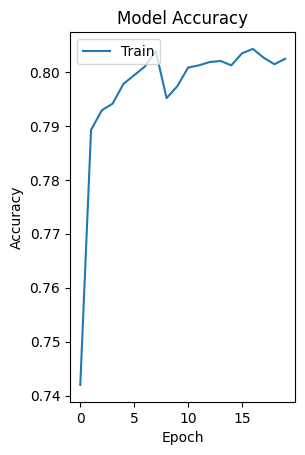

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')

 Plot training & validation loss values

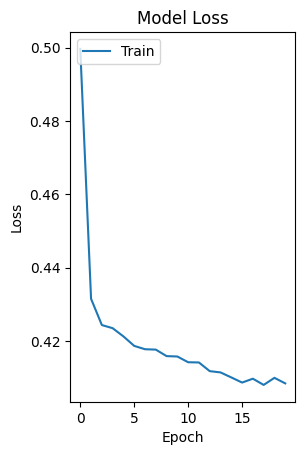

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper left')


Making predictions using a trained MLP (Multi-Layer Perceptron) model on a test
dataset. The predicted values are then converted to binary values by comparing them to a threshold of 0.5. Values greater than 0.5 are considered as 1 (positive class) and values less than or equal to 0.5 are considered as 0 (negative class).

In [ ]:
y_pred = best_mlp_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

33/33 [==============================] - 0s 2ms/step


*Display classification report*

In [ ]:
classification_rep = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       778
           1       0.69      0.50      0.58       278

    accuracy                           0.81      1056
   macro avg       0.76      0.71      0.73      1056
weighted avg       0.80      0.81      0.80      1056



Best parameters and accuracys

In [ ]:
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found(Training): {:.2%}".format(grid_result.best_score_))
print("Validation set accuracy: {:.2%}".format(validation_accuracy))
print("Test set accuracy: {:.2%}".format(test_accuracy))

Best parameters found:  {'batch_size': 64, 'epochs': 20, 'validation_split': 0.1}
Best accuracy found(Training): 79.55%
Validation set accuracy: 79.38%
Test set accuracy: 80.87%


# Calculating AUC score and Accuracy

Evaluating the model on the validation set

In [ ]:
validation_preds = best_mlp_model.predict(X_val)
validation_accuracy = best_mlp_model.evaluate(X_val, y_val, verbose=0)[1]
validation_auc = roc_auc_score(y_val, validation_preds)

34/34 [==============================] - 1s 9ms/step


Printing Accuracy and AUC score

In [ ]:
print("Validation set accuracy: {:.2%}".format(validation_accuracy))
print("Validation set AUC: {:.4f}".format(validation_auc))

Validation set accuracy: 79.38%
Validation set AUC: 0.8500


Training and testing the model

In [ ]:
best_mlp_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], verbose=2)

test_preds = best_mlp_model.predict(X_test)
test_accuracy = best_mlp_model.evaluate(X_test, y_test, verbose=0)[1]
test_auc = roc_auc_score(y_test, test_preds)

Epoch 1/20
78/78 - 0s - loss: 0.4076 - accuracy: 0.8049 - 266ms/epoch - 3ms/step
Epoch 2/20
78/78 - 0s - loss: 0.4061 - accuracy: 0.8061 - 258ms/epoch - 3ms/step
Epoch 3/20
78/78 - 0s - loss: 0.4035 - accuracy: 0.8057 - 220ms/epoch - 3ms/step
Epoch 4/20
78/78 - 0s - loss: 0.4029 - accuracy: 0.8034 - 203ms/epoch - 3ms/step
Epoch 5/20
78/78 - 0s - loss: 0.4013 - accuracy: 0.8079 - 218ms/epoch - 3ms/step
Epoch 6/20
78/78 - 0s - loss: 0.4049 - accuracy: 0.8089 - 231ms/epoch - 3ms/step
Epoch 7/20
78/78 - 0s - loss: 0.4032 - accuracy: 0.8059 - 221ms/epoch - 3ms/step
Epoch 8/20
78/78 - 0s - loss: 0.4011 - accuracy: 0.8079 - 238ms/epoch - 3ms/step
Epoch 9/20
78/78 - 0s - loss: 0.4015 - accuracy: 0.8059 - 215ms/epoch - 3ms/step
Epoch 10/20
78/78 - 0s - loss: 0.3995 - accuracy: 0.8099 - 213ms/epoch - 3ms/step
Epoch 11/20
78/78 - 0s - loss: 0.3993 - accuracy: 0.8079 - 240ms/epoch - 3ms/step
Epoch 12/20
78/78 - 0s - loss: 0.3979 - accuracy: 0.8108 - 212ms/epoch - 3ms/step
Epoch 13/20
78/78 - 0s - 

Printing results for Test set AUC and Accuracy

In [ ]:
print("Test set accuracy: {:.2%}".format(test_accuracy))
print("Test set AUC: {:.4f}".format(test_auc))

Test set accuracy: 81.25%
Test set AUC: 0.8536


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.4f}".format(accuracy))

y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_prob[:, 1])
print("AUC Score: {:.4f}".format(auc_score))


17/17 [==============================] - 0s 3ms/step
Test Accuracy: 0.8049
17/17 [==============================] - 0s 2ms/step
AUC Score: 0.8533


 Train and testing optimized model

In [ ]:
optimized_model = grid_search.best_estimator_
optimized_model.fit(X_train, y_train)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


70/70 [==============================] - 2s 9ms/step - loss: 0.5332 - accuracy: 0.7235 - val_loss: 0.4268 - val_accuracy: 0.8012
Epoch 2/20
70/70 [==============================] - 0s 5ms/step - loss: 0.4395 - accuracy: 0.7823 - val_loss: 0.4062 - val_accuracy: 0.8174
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.7890 - val_loss: 0.4014 - val_accuracy: 0.8174
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.7931 - val_loss: 0.3957 - val_accuracy: 0.8073
Epoch 5/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.7922 - val_loss: 0.4004 - val_accuracy: 0.8174
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.7965 - val_loss: 0.3945 - val_accuracy: 0.8195
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4222 - accuracy: 0.7936 - val_loss: 0.3911 - val_accuracy: 0.8174
Epoch 8/20
70/70 [=============

KerasClassifier(
	model=None
	build_fn=<function create_mlp_model at 0x7c563553a830>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.1
	shuffle=True
	run_eagerly=False
	epochs=20
	input_shape=8
	class_weight=None
)

Printing the Accuracy and AUC of the optimized model

In [ ]:
y_pred_optimized = optimized_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print("Optimized Model Test Accuracy: {:.4f}".format(accuracy_optimized))


y_pred_prob_optimized = optimized_model.predict_proba(X_test)
auc_score_optimized = roc_auc_score(y_test, y_pred_prob_optimized[:, 1])
print("Optimized Model AUC Score: {:.4f}".format(auc_score_optimized))


17/17 [==============================] - 0s 2ms/step
Optimized Model Test Accuracy: 0.8116
17/17 [==============================] - 0s 2ms/step
Optimized Model AUC Score: 0.8528


Optimized results

In [ ]:
print("Optimized Model Test Accuracy: {:.4f}".format(accuracy_optimized))
print("Optimized Model AUC Score: {:.4f}".format(auc_score_optimized))

Optimized Model Test Accuracy: 0.8116
Optimized Model AUC Score: 0.8528


# Saving Model and Scaler

In [ ]:
import joblib

# After training and optimizing your model
joblib.dump(optimized_model, 'optimized_model.pkl')

['optimized_model.pkl']

In [ ]:
# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']